In [1]:
%matplotlib inline
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
random.seed(42)

from apidata import closing_prices

In [2]:
stocks = ["AMZN", "JPM", "MSFT", "PG", "T"]

In [7]:
def generate_test_portfolio(stocks):
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)
    allocation = {a:round(wt, 2) for a, wt in zip(stocks, weights)}
    print("\nRandomly Generated Portfolio Weights:\n", allocation)
    
    test_pfolio = closing_prices(stocks[0])
    print(f"\nStock:{stocks[0]}\t"
          f"Weight:{allocation[stocks[0]]}\n")
    
    print(test_pfolio.head())
    
    for stock in stocks[1:]:
        add_s = closing_prices(stock)
        test_pfolio = pd.merge(test_pfolio, add_s, on="Date", how="inner")
        print(f"\nStock: {stock}\t"
              f"Weight:{allocation[stock]}\n")
        print(add_s.head())
        del add_s
    
    # Plot Individual Performance of all Stocks in Portfolio
    test_pfolio.set_index("Date", inplace=True)
    plot_pfolio = (test_pfolio/test_pfolio.iloc[0] * 100).plot()
    plt.title("Performance Attribution")
    plt.xlabel("Date")
    plt.ylabel("Return")
    plt.grid(axis="y", linestyle="dashed") 
    plt.show()
    
    portfolio_pct = np.log(test_pfolio/test_pfolio.shift(1)).iloc[1:]
    expRtn = np.sum(portfolio_pct.mean() * weights)
    expVar = np.sqrt(np.dot(weights.T, np.dot(portfolio_pct.cov()*250, weights)))
    sharpe = round(expRtn/expVar,4)
    
    test_bench = pd.read_csv("S&P500.csv")[["Date", "Close"]] \
        .rename(columns={"Close":"SP500"})
    test_bench["Date"] = pd.to_datetime(test_bench["Date"])
    test_bench.set_index("Date", inplace=True)
    benchmark_pct = np.log(test_bench/test_bench.shift(1)).iloc[1:].reset_index()
    
    portfolio_pct['RTNp'] = np.sum(portfolio_pct, axis=1)
    portfolio_pct.reset_index(inplace=True)
    portfolio_pct = pd.merge(portfolio_pct, benchmark_pct, on="Date", how="inner")
    portfolio_pct["abs_perform"] = portfolio_pct["RTNp"] - portfolio_pct["SP500"]
    portfolio_pct.set_index("Date", inplace=True)
    
    # Plot Volatility of Returns -- Portfolio
    portfolio_pct["RTNp"].plot(alpha=0.75)
    plt.title("[Portfolio] Volatility of Returns")
    plt.xlabel("Daily %Return")
    plt.ylabel("Date")
    plt.ylim(-.1, .1)
    plt.grid(axis="y", linestyle="dashed")
    plt.show()

    # Plot Volatility of Returns -- Market
    portfolio_pct["SP500"].plot(alpha=0.75)
    plt.title("[Market] Volatility of Returns")
    plt.xlabel("Daily %Return")
    plt.ylabel("Date")
    plt.ylim(-.1, .1)
    plt.grid(axis="y", linestyle="dashed")
    plt.show()
    
    pfolio_stats = {"num": len(stocks),
                    "rtn": round(expRtn, 4),
                    "var": round(expVar, 4),
                    "sharpe": sharpe,
                    "beta": 1.2}
                    
    print("\nPortfolio Stats:\n", pfolio_stats)
    return portfolio_pct
        


Randomly Generated Portfolio Weights:
 {'AMZN': 0.24, 'JPM': 0.21, 'MSFT': 0.09, 'PG': 0.26, 'T': 0.2}

Stock:AMZN	Weight:0.24

        Date    AMZN
0 2014-01-02  397.97
1 2014-01-03  396.44
2 2014-01-06  393.63
3 2014-01-07  398.03
4 2014-01-08  401.92

Stock: JPM	Weight:0.21

        Date    JPM
0 2014-01-02  58.21
1 2014-01-03  58.66
2 2014-01-06  59.00
3 2014-01-07  58.32
4 2014-01-08  58.87

Stock: MSFT	Weight:0.09

        Date   MSFT
0 2014-01-02  37.16
1 2014-01-03  36.91
2 2014-01-06  36.13
3 2014-01-07  36.41
4 2014-01-08  35.76

Stock: PG	Weight:0.26

        Date     PG
0 2014-01-02  80.54
1 2014-01-03  80.45
2 2014-01-06  80.64
3 2014-01-07  81.42
4 2014-01-08  80.24

Stock: T	Weight:0.2

        Date      T
0 2014-01-02  34.95
1 2014-01-03  34.80
2 2014-01-06  34.96
3 2014-01-07  34.95
4 2014-01-08  34.24


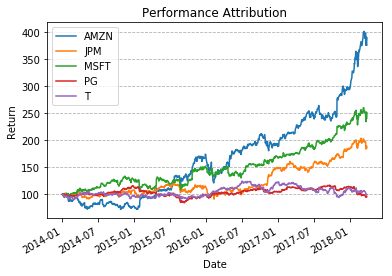

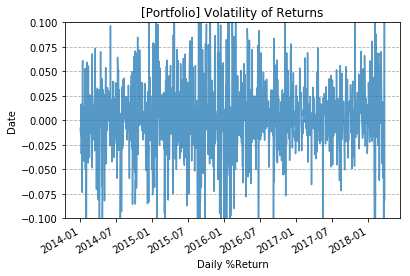

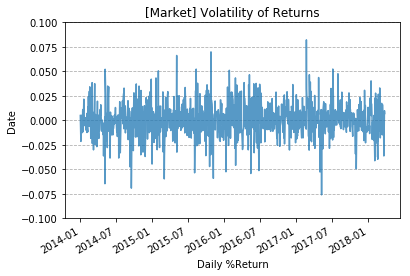


Portfolio Stats:
 {'num': 5, 'rtn': 0.0005, 'var': 0.1389, 'sharpe': 0.0035, 'beta': 1.2}


In [8]:
pfolio_test = generate_test_portfolio(stocks)

In [10]:
pfolio_test.describe()

,AMZN,JPM,MSFT,PG,T,RTNp,SP500,abs_perform
count,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000
mean,0.001246,0.000583,0.000827,-0.000033,-0.000001,0.002622,0.000294,0.002328
std,0.018554,0.013134,0.014059,0.008740,0.010242,0.044881,0.017077,0.043443
min,-0.116503,-0.072008,-0.097099,-0.040889,-0.062951,-0.220910,-0.076003,-0.220021
25%,-0.006915,-0.005518,-0.005919,-0.004444,-0.005187,-0.018958,-0.008794,-0.019376
50%,0.001109,0.000533,0.000360,-0.000114,0.000290,0.002162,0.000000,0.002448
75%,0.010329,0.007472,0.007363,0.004544,0.005995,0.024793,0.009350,0.025720
max,0.132178,0.079999,0.099413,0.036433,0.048764,0.237110,0.082238,0.230701


In [11]:
pfolio_test.count()

AMZN           1063
JPM            1063
MSFT           1063
PG             1063
T              1063
RTNp           1063
SP500          1063
abs_perform    1063
dtype: int64

In [12]:
np.sum(pfolio_test, axis=0)

AMZN           1.324875
JPM            0.619647
MSFT           0.878670
PG            -0.034741
T             -0.001432
RTNp           2.787020
SP500          0.312238
abs_perform    2.474781
dtype: float64

In [15]:
pfolio_test.head()

,AMZN,JPM,MSFT,PG,T,RTNp,SP500,abs_perform
Date,,,,,,,,
2014-01-03,-0.003852,0.007701,-0.006750,-0.001118,-0.004301,-0.008321,0.005026,-0.013347
2014-01-06,-0.007113,0.005779,-0.021359,0.002359,0.004587,-0.015747,-0.021439,0.005692
2014-01-07,0.011116,-0.011592,0.007720,0.009626,-0.000286,0.016584,0.005109,0.011475
2014-01-08,0.009726,0.009387,-0.018014,-0.014599,-0.020524,-0.034024,-0.005897,-0.028127
2014-01-09,-0.002267,-0.001870,-0.006453,0.002241,-0.020656,-0.029005,-0.005932,-0.023072


In [ ]:
close_prices = pd.DataFrame(
    np.random.random(100).reshape(10,-1), 
    columns="a,b,c,d,e,f,g,h,i,j".split(",")
    ).apply(lambda x: round(x*100, 4))

close_prices.head()

In [ ]:
pct_returns = round(np.log(close_prices/close_prices.shift(1)).iloc[1:],4)
pct_returns.head()